In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from PLA import PlaPocket
from Regressao_Logistica import RegressaoLogistica
from regressao_linear import RegressaoLinear
import numpy as np
from funcoes import *

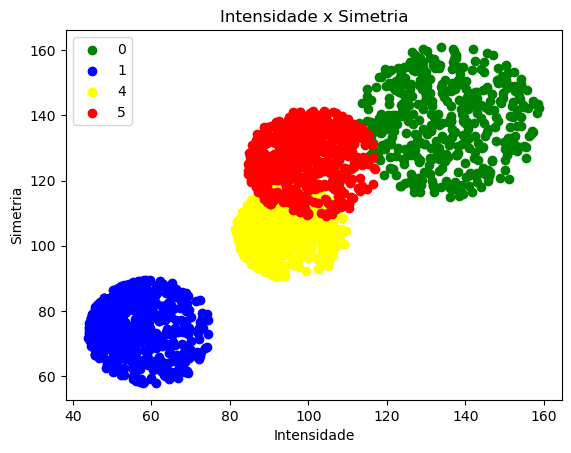

In [9]:
train = pd.read_csv('Dados/train_reduzido.csv', sep=";")
test = pd.read_csv('Dados/test_reduzido.csv', sep=";")


# Separando os dados por classe
train_0 = train[train['label'] == 0]
train_1 = train[train['label'] == 1]
train_4 = train[train['label'] == 4]
train_5 = train[train['label'] == 5]

# Plotando os pontos para cada classe com cores diferentes e legendas
plt.scatter(train_0["intensidade"], train_0["simetria"], c='green', label='0')
plt.scatter(train_1["intensidade"], train_1["simetria"], c='blue', label='1')
plt.scatter(train_4["intensidade"], train_4["simetria"], c='yellow', label='4')
plt.scatter(train_5["intensidade"], train_5["simetria"], c='red', label='5')

plt.xlabel("Intensidade")
plt.ylabel("Simetria")
plt.title("Intensidade x Simetria")
plt.legend()
plt.show()

In [10]:
X = train[['intensidade', 'simetria']].values
y = train['label'].values

X_train = padronizar(X)

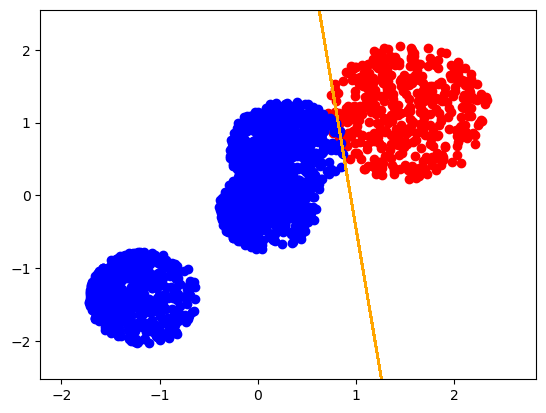

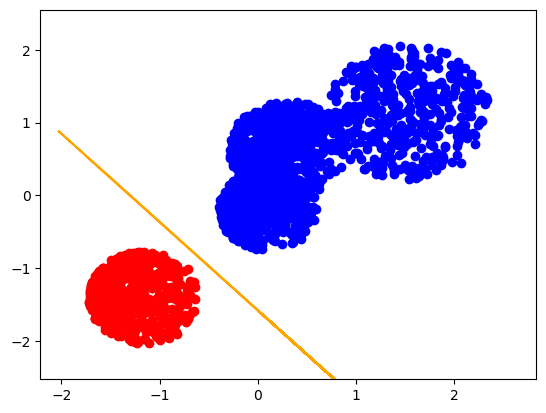

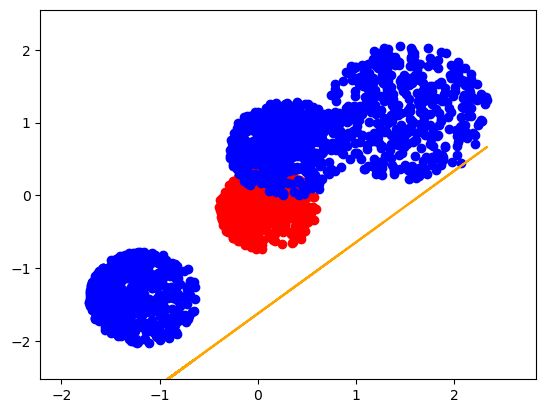

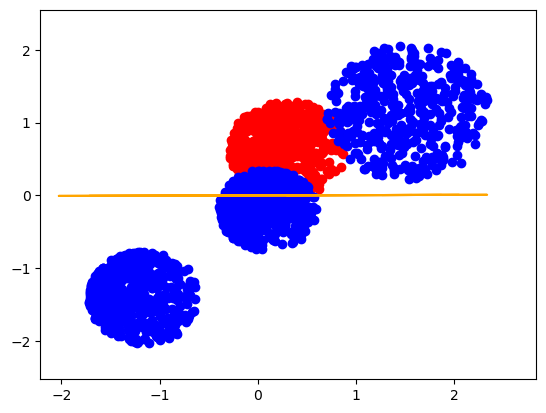

In [11]:
# um contra todos para o PLA
y_train_0 = np.where(y == 0, 1, -1)
y_train_1 = np.where(y == 1, 1, -1)
y_train_4 = np.where(y == 4, 1, -1)
y_train_5 = np.where(y == 5, 1, -1)

pla_0 = PlaPocket(X_train, y_train_0)
pla_0.fit()
pla_0.plot()

pla_1 = PlaPocket(X_train, y_train_1)
pla_1.fit()
pla_1.plot()

pla_4 = PlaPocket(X_train, y_train_4)
pla_4.fit()
pla_4.plot()

pla_5 = PlaPocket(X_train, y_train_5)
pla_5.fit()
pla_5.plot()

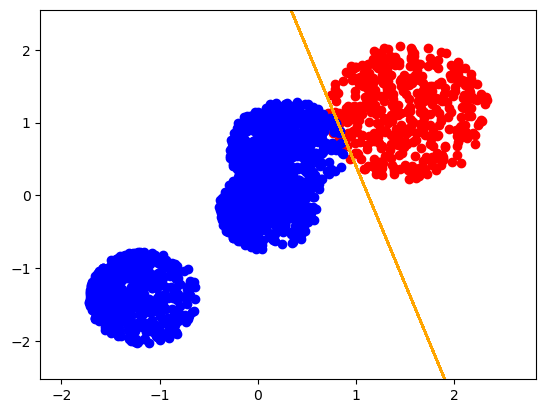

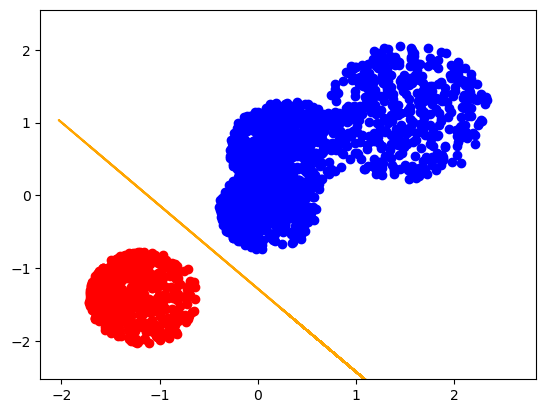

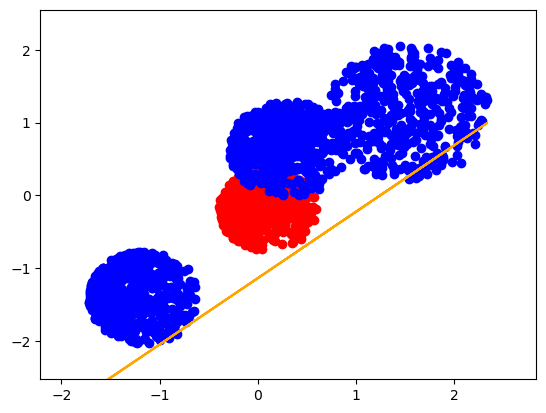

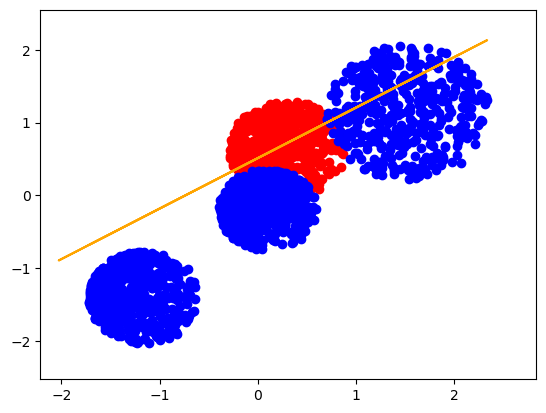

In [12]:
# um contra todos para a Regressão Logística
y_train_0 = np.where(y == 0, 1, 0)
y_train_1 = np.where(y == 1, 1, 0)
y_train_4 = np.where(y == 4, 1, 0)
y_train_5 = np.where(y == 5, 1, 0)

rlog_0 = RegressaoLogistica(X_train, y_train_0)
rlog_0.fit()
rlog_0.plot()

rlog_1 = RegressaoLogistica(X_train, y_train_1)
rlog_1.fit()
rlog_1.plot()

rlog_4 = RegressaoLogistica(X_train, y_train_4)
rlog_4.fit()
rlog_4.plot()

rlog_5 = RegressaoLogistica(X_train, y_train_5)
rlog_5.fit()
rlog_5.plot()

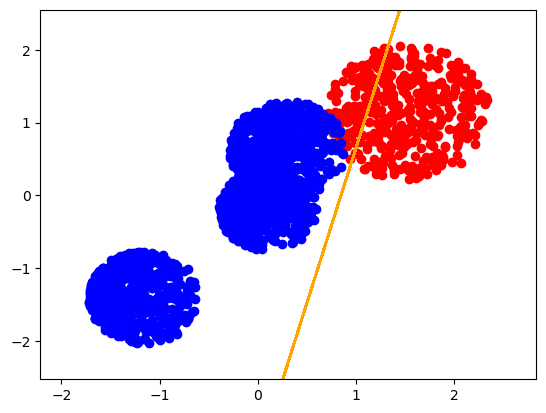

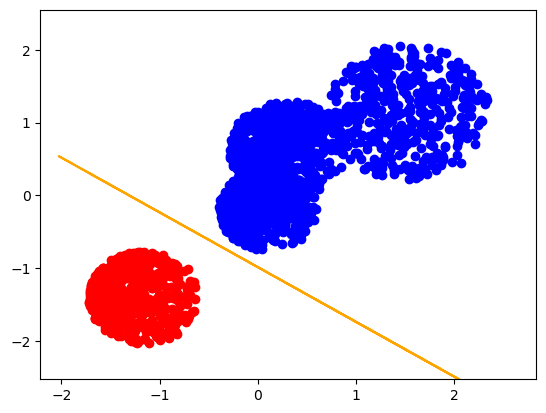

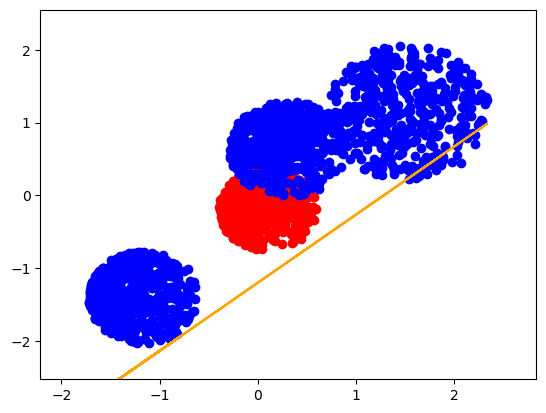

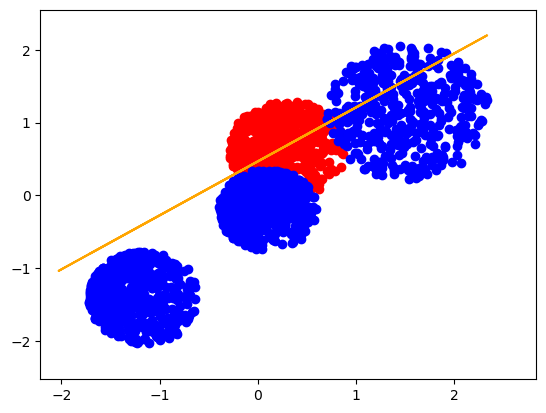

In [13]:
# um contra todos para a Regressão Linear
y_train_0 = np.where(y == 0, 1, -1)
y_train_1 = np.where(y == 1, 1, -1)
y_train_4 = np.where(y == 4, 1, -1)
y_train_5 = np.where(y == 5, 1, -1)

rlin_0 = RegressaoLinear(X_train, y_train_0)
rlin_0.fit()
rlin_0.plot()

rlin_1 = RegressaoLinear(X_train, y_train_1)
rlin_1.fit()
rlin_1.plot()

rlin_4 = RegressaoLinear(X_train, y_train_4)
rlin_4.fit()
rlin_4.plot()

rlin_5 = RegressaoLinear(X_train, y_train_5)
rlin_5.fit()
rlin_5.plot()

In [14]:
X_test = test[['intensidade', 'simetria']].values
y_test = test['label'].values

X_test = padronizar(X_test)

In [15]:

# um contra todos para o PLA
y_predict = []
for imagem in X_test:
    if pla_0.predict(imagem) == 1:
        y_predict.append(0)
    elif pla_1.predict(imagem) == 1:
        y_predict.append(1)
    elif pla_4.predict(imagem) == 1:
        y_predict.append(4)
    else:
        y_predict.append(5)

y_predict = np.array(y_predict)

print("Acurácia PLA: ", acuracia(y_test, y_predict))


Acurácia PLA:  71.03139013452915


In [16]:
# um contra todos para a Regressão Logística
y_predict = []
for imagem in X_test:
    if rlog_0.predict(imagem) == 1:
        y_predict.append(0)
    elif rlog_1.predict(imagem) == 1:
        y_predict.append(1)
    elif rlog_4.predict(imagem) == 1:
        y_predict.append(4)
    else:
        y_predict.append(5)

y_predict = np.array(y_predict)

print("Acurácia Regressão Logística: ", acuracia(y_test, y_predict))

Acurácia Regressão Logística:  71.12107623318386


In [17]:
# um contra todos para a Regressão Linear
y_predict = []

for imagem in X_test:
    if rlin_0.predict(imagem) == 1:
        y_predict.append(0)
    elif rlin_1.predict(imagem) == 1:
        y_predict.append(1)
    elif rlin_4.predict(imagem) == 1:
        y_predict.append(4)
    else:
        y_predict.append(5)

y_predict = np.array(y_predict)

print("Acurácia Regressão Linear: ", acuracia(y_test, y_predict))

Acurácia Regressão Linear:  67.89237668161435
